In [0]:
!wget https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv

--2019-02-24 02:46:10--  https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv
Resolving d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)... 99.84.239.112, 99.84.239.56, 99.84.239.79, ...
Connecting to d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)|99.84.239.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7847932 (7.5M) [application/octet-stream]
Saving to: ‘a943287.csv’

a943287.csv         100%[===================>]   7.48M  9.41MB/s    in 0.8s    

2019-02-24 02:46:12 (9.41 MB/s) - ‘a943287.csv’ saved [7847932/7847932]



In [0]:
import pandas as pd, numpy as np
from skimage import io

In [0]:
data = pd.read_csv('/content/a943287.csv')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [0]:
data[['_unit_id','image_url','please_select_the_gender_of_the_person_in_the_picture']].head()

,_unit_id,image_url,please_select_the_gender_of_the_person_in_the_picture
0,1023132475,https://d1qb2nb5cznatu.cloudfront.net/users/40...,male
1,1023132476,https://d1qb2nb5cznatu.cloudfront.net/users/42...,male
2,1023132477,https://d1qb2nb5cznatu.cloudfront.net/users/44...,male
3,1023132478,https://d1qb2nb5cznatu.cloudfront.net/users/47...,male
4,1023132479,https://d1qb2nb5cznatu.cloudfront.net/users/50...,male


In [0]:
data['please_select_the_gender_of_the_person_in_the_picture'].value_counts()

male      47595
unsure     9122
female     7367
Name: please_select_the_gender_of_the_person_in_the_picture, dtype: int64

In [0]:
data_male = data[data['please_select_the_gender_of_the_person_in_the_picture']=="male"].reset_index(drop='index')
data_female = data[data['please_select_the_gender_of_the_person_in_the_picture']=="female"].reset_index(drop='index')

In [0]:
final_data = pd.concat([data_male[:1000],data_female[:1000]],axis=0).reset_index(drop='index')
final_data.shape

(2000, 10)

In [0]:
final_data.loc[1200]

_unit_id                                                                                                   1023135686
_golden                                                                                                         False
_unit_state                                                                                                 finalized
_trusted_judgments                                                                                                  1
_last_judgment_at                                                                                  8/19/2016 22:31:27
please_select_the_gender_of_the_person_in_the_picture                                                          female
please_select_the_gender_of_the_person_in_the_picture:confidence                                                    1
image_url                                                           https://d1qb2nb5cznatu.cloudfront.net/users/29...
please_select_the_gender_of_the_person_in_the_picture_go

In [0]:
x = []
y = []
for i in range(final_data.shape[0]):
  if(i%100==0):
    print(i)
  try:
    image = io.imread(final_data.loc[i]['image_url'])
    if(image.shape==(300,300,3)):
      x.append(image)
      y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
  except:
    continue

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


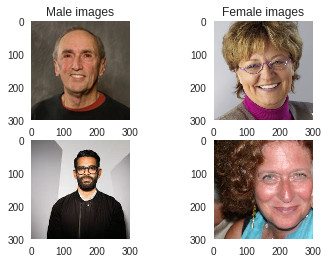

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[0])
plt.title('Male images')
plt.grid('off')
plt.subplot(222)
plt.title('Female images')
plt.imshow(x[1000])
plt.grid('off')
plt.subplot(223)
plt.imshow(x[1])
plt.grid('off')
plt.subplot(224)
plt.imshow(x[1001])
plt.grid('off')
plt.show()

In [0]:
np.array(x).shape

(1768, 300, 300, 3)

In [0]:
x2 = []
y2 = []
for i in range(len(x)):
  img = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)
  img2 = cv2.resize(img,(50,50))
  x2.append(img2)
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


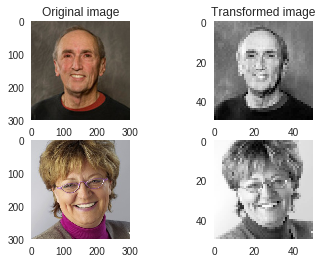

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[0])
plt.title('Original image')
plt.grid('off')
plt.subplot(222)
plt.title('Transformed image')
plt.imshow(1-x2[0,:,:,0])
plt.grid('off')
plt.subplot(223)
plt.imshow(x[1000])
plt.grid('off')
plt.subplot(224)
plt.imshow(1-x2[1000,:,:,0])
plt.grid('off')
plt.show()

In [0]:
x2[0]

array([[82, 87, 80, ..., 76, 77, 77],
       [79, 80, 86, ..., 75, 77, 74],
       [84, 79, 73, ..., 73, 75, 75],
       ...,
       [28, 26, 19, ..., 16, 16, 15],
       [14, 24, 15, ..., 12, 14, 13],
       [12, 20, 13, ..., 12, 13, 13]], dtype=uint8)

In [0]:
y[:5]

['male', 'male', 'male', 'male', 'male']

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

In [0]:
x2 = np.array(x2)

In [0]:
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],1)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 2, 2, 512)         1180160   
__________

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
X = np.array(x2)/255
Y = np.array(y2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1591, 50, 50, 1) (177, 50, 50, 1) (1591,) (177,)


In [0]:
np.mean(y_train)

0.4896291640477687

In [0]:
history = model.fit(X_train, y_train, batch_size=32,epochs=50,verbose=1,validation_data = (X_test, y_test))

Train on 1591 samples, validate on 177 samples
Epoch 1/50
1591/1591 [==============================] - 2s 1ms/step - loss: 0.6934 - acc: 0.5072 - val_loss: 0.6849 - val_acc: 0.5198
Epoch 2/50
1591/1591 [==============================] - 1s 580us/step - loss: 0.6550 - acc: 0.6122 - val_loss: 0.6138 - val_acc: 0.6836
Epoch 3/50
1591/1591 [==============================] - 1s 567us/step - loss: 0.5874 - acc: 0.6801 - val_loss: 0.5998 - val_acc: 0.7062
Epoch 4/50
1591/1591 [==============================] - 1s 572us/step - loss: 0.4933 - acc: 0.7599 - val_loss: 0.5978 - val_acc: 0.7175
Epoch 5/50
1591/1591 [==============================] - 1s 570us/step - loss: 0.4366 - acc: 0.7945 - val_loss: 0.6106 - val_acc: 0.7345
Epoch 6/50
1591/1591 [==============================] - 1s 569us/step - loss: 0.3485 - acc: 0.8510 - val_loss: 0.6196 - val_acc: 0.7232
Epoch 7/50
1591/1591 [==============================] - 1s 570us/step - loss: 0.2972 - acc: 0.8749 - val_loss: 0.6236 - val_acc: 0.7571
Epo

In [0]:
np.mean(Y)

0.8640606767794633

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


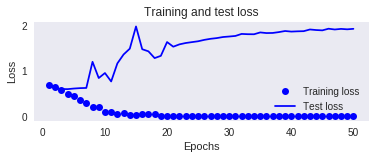

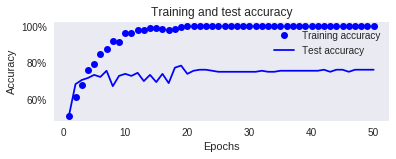

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()
